In [3]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/8.7 MB 1.2 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.7 MB 1.4 MB/s eta 0:00:05
   --------------- ------------------------ 3.4/8.7 MB 1.6 MB/s eta 0:00:04
   ---------------- --------------------

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = cancer_data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

# Initialize PCA and reduce from 30 components to 2.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_scaled)

# Create a Dataframe with the principal components
pca_df = pd.DataFrame(data=principal_comp, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Check the explained variance
exp_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {exp_variance[0]:.2%}")
print(f"Variance explained by PC2: {exp_variance[1]:.2%}")
print(f"Total variance explained by both components: {exp_variance.sum():.2%}")

Variance explained by PC1: 44.27%
Variance explained by PC2: 18.97%
Total variance explained by both components: 63.24%


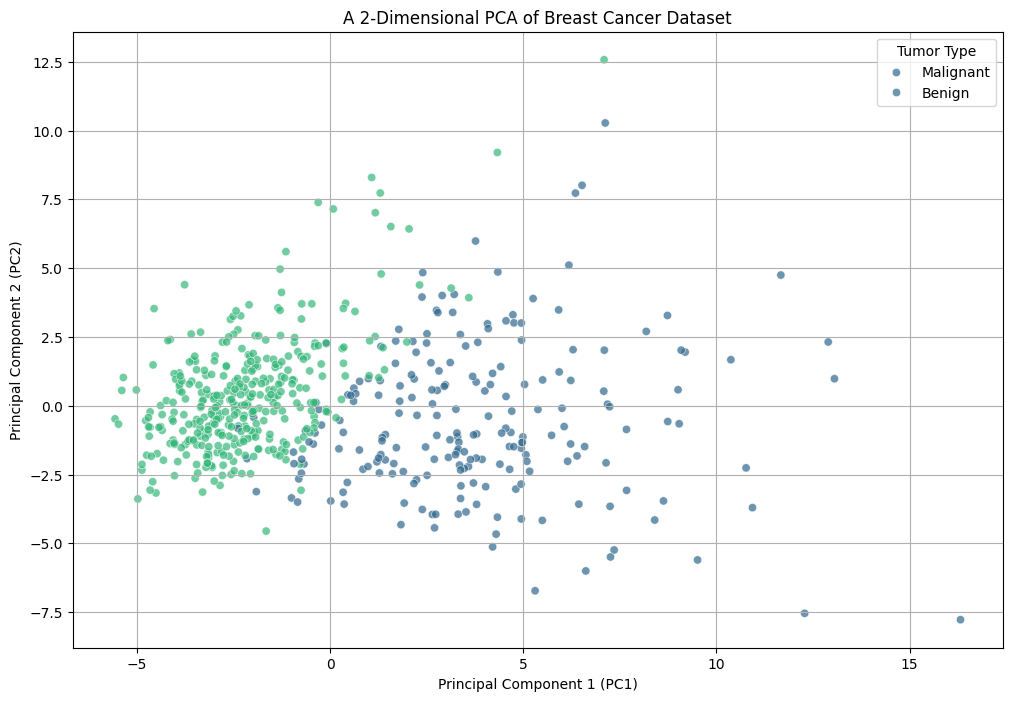

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis', alpha=0.7)
plt.title('A 2-Dimensional PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Tumor Type', labels=['Malignant', 'Benign'])
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the features 
X_pca = pca_df[['PC1', 'PC2']]
y_pca = pca_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy using two Principal Components: {accuracy:.2%}")

Model Accuracy using two Principal Components: 97.08%
